In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\souma\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1


### Dataset Discovery

In [28]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\souma\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1\Student_Performance.csv")
dataset.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [30]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Preprocessing

In [43]:
print(f"number of duplicates is: {dataset.duplicated().sum()}")
dataset.drop_duplicates(inplace=True)

number of duplicates is: 127


In [44]:
dataset.shape

(9873, 6)

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Extracurricular Activities'] = encoder.fit_transform(dataset['Extracurricular Activities'])

In [47]:
dataset.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
7372,2,46,1,6,8,21.0
5898,7,41,0,4,7,31.0
5350,5,66,1,9,7,54.0
7975,8,58,0,5,3,52.0
124,4,56,0,4,7,36.0


### Data Vizualisation

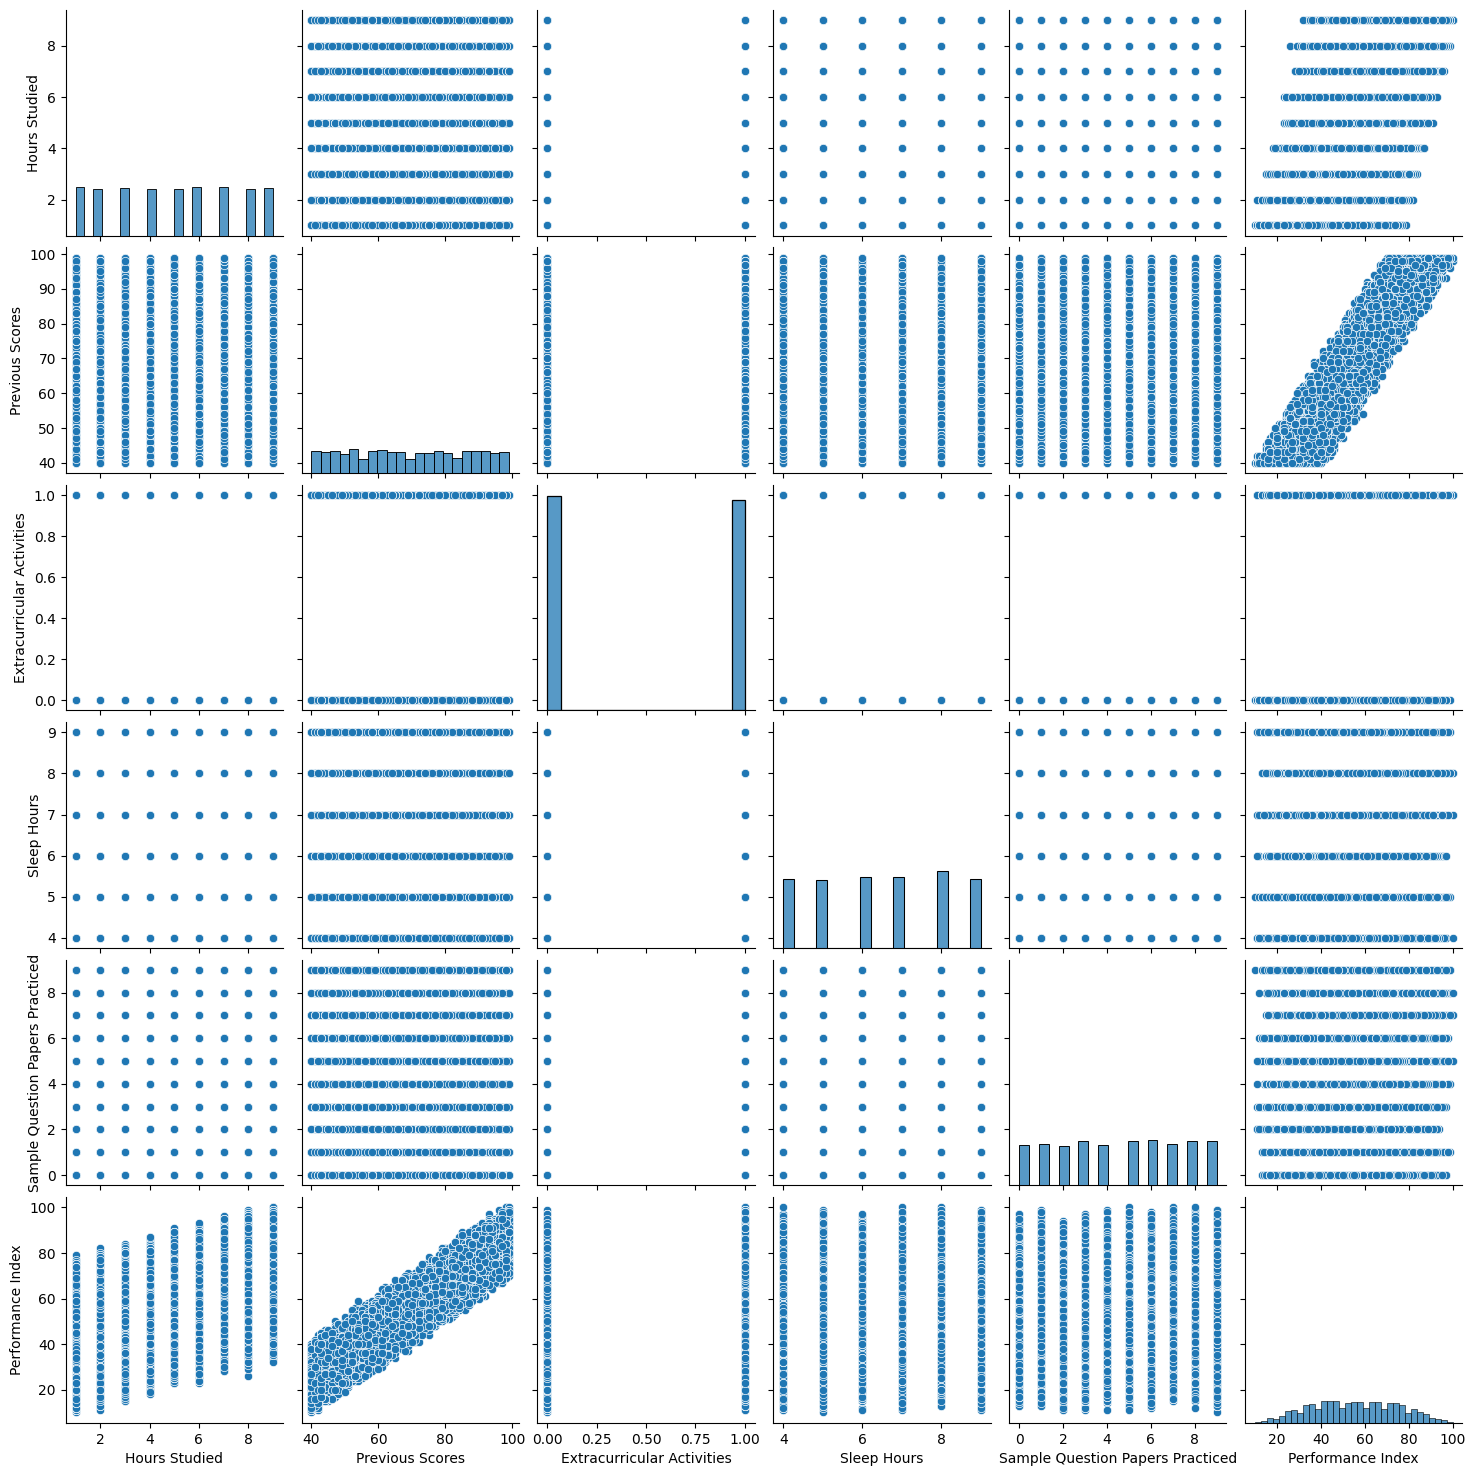

In [48]:
import seaborn as sns

sns.pairplot(dataset)

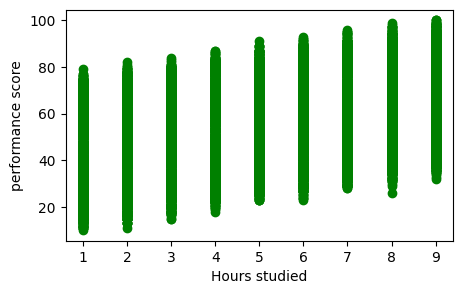

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.scatter(dataset["Hours Studied"], dataset["Performance Index"], color="green")
plt.xlabel("Hours studied")
plt.ylabel("performance score")
plt.show()

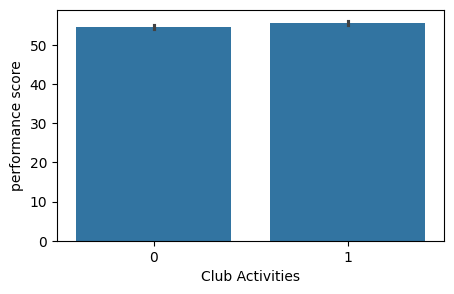

In [69]:
plt.figure(figsize=(5,3))
sns.barplot(x="Extracurricular Activities", y="Performance Index", data= dataset)
plt.xlabel("Club Activities")
plt.ylabel("performance score")
plt.show()

<Figure size 800x500 with 0 Axes>

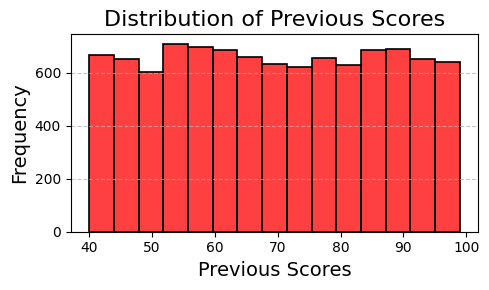

In [70]:
plt.figure(figsize=(8,5))

plt.figure(figsize=(5,3))
sns.histplot(x=dataset["Previous Scores"], bins=15, color='red', edgecolor='black',linewidth=1.2 )

plt.title("Distribution of Previous Scores", fontsize=16)
plt.xlabel("Previous Scores", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

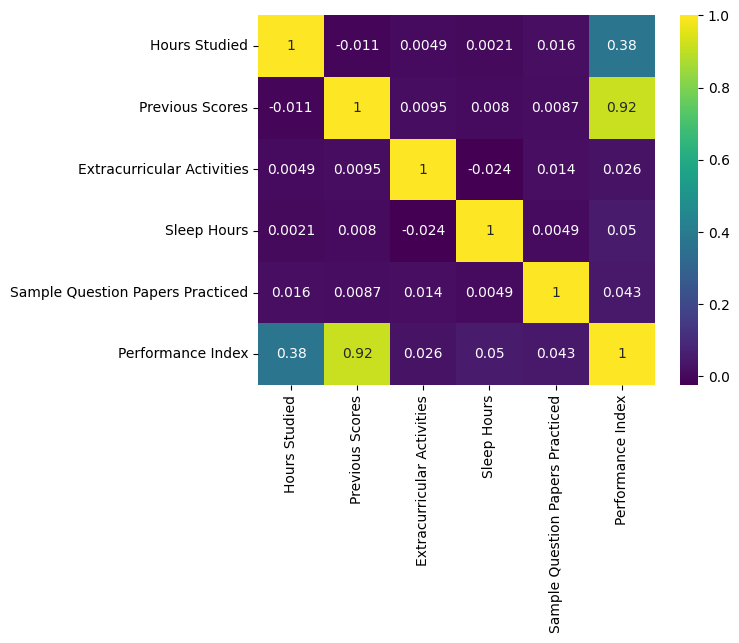

In [64]:
correlation_matrix = dataset.corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True, cmap="viridis")
plt.show()

These vizualisation give a rough idea about what parameter affects the performance index.  
We can see that sleep hours and the number of sample questions answered as well as extrecurricular activities hardly affect the final score of performance, whereas Previous Scores are highly correlated with our target measure.  
Let's confirm or refuse this based on stastical measures.

In [74]:
#splitting and scaling data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= dataset.drop("Performance Index", axis=1)
y= dataset["Performance Index"]

scaler = StandardScaler()
Scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, train_size=0.8, random_state=42)
print(f"training set shape: {X_train.shape, y_train.shape}")
print(f"testing set shape: {X_test.shape, y_test.shape}")

training set shape: ((7898, 5), (7898,))
testing set shape: ((1975, 5), (1975,))


In [91]:
#Regression Model _ singular
from sklearn.linear_model import LinearRegression
lr_single = LinearRegression()

X_train_single = X_train[["Previous Scores"]]
X_test_single = X_test[["Previous Scores"]]

lr_single.fit(X_train_single, y_train)

LinearRegression()

In [92]:
y_pred_single = lr_single.predict(X_test_single)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

print("R² Score:", r2_score(y_test, y_pred_single))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_single)))

R² Score: 0.835796514007374
RMSE: 7.817336286785936


In [98]:
#Regression Model_ multiple
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred_multiple = lr_multiple.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_multiple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))

R² Score: 0.9884301209927054
RMSE: 2.0750664901488047


In [107]:
#coefficients of parameters in the multi regression model

coeff = lr_multiple.coef_
feat = X_train.columns

coeff_matrix = pd.DataFrame({'Features': feat,"Coefficients": coeff}).sort_values(by='Coefficients', ascending=False)

coeff_matrix

,Features,Coefficients
1,Previous Scores,17.644024
0,Hours Studied,7.381153
3,Sleep Hours,0.801390
4,Sample Question Papers Practiced,0.541024
2,Extracurricular Activities,0.286897


C:\Users\souma\AppData\Local\Temp\ipykernel_12988\2487239831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficients', y='Features', data=coeff_matrix, palette='viridis')


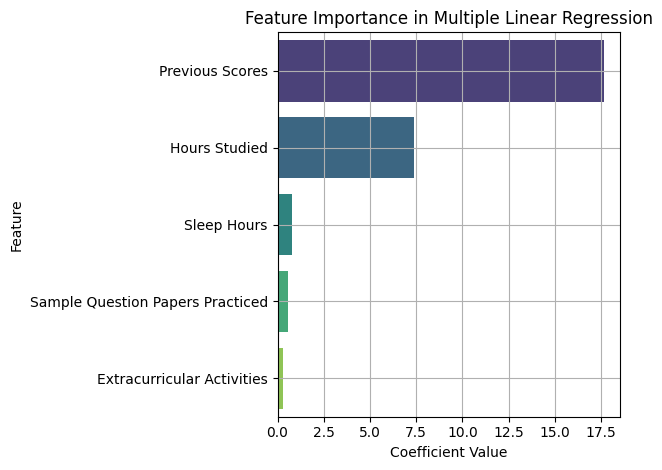

In [109]:
sns.barplot(x='Coefficients', y='Features', data=coeff_matrix, palette='viridis')
plt.title("Feature Importance in Multiple Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
pd.DataFrame({'Actual Performance': y_test, 'single_Predicted Performance': y_pred_single ,
              'multi_Predicted Performance': y_pred_multiple })

,Actual Performance,single_Predicted Performance,multi_Predicted Performance
6099,47.0,49.686178,46.480013
106,76.0,76.076265,80.285379
9265,62.0,58.821208,61.065188
4707,23.0,28.371107,22.706315
2155,76.0,61.866218,74.836868
...,...,...,...
8732,19.0,27.356104,18.277835
3112,39.0,45.626165,40.310084
5297,77.0,85.211296,77.084436
6116,88.0,80.136279,86.246766


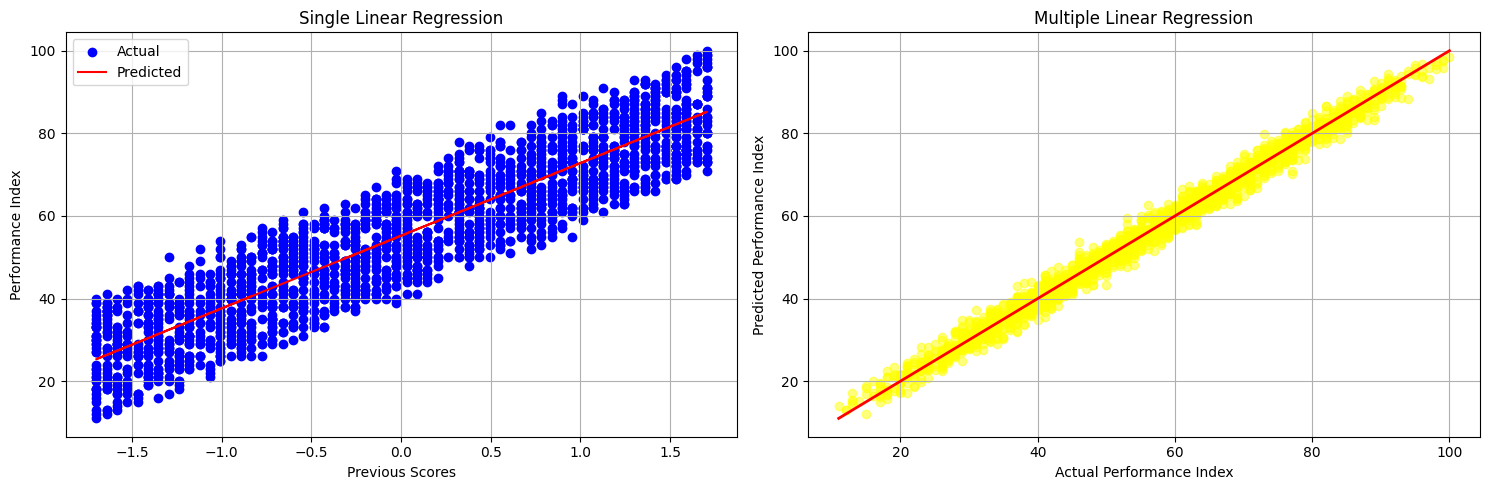

In [114]:
plt.figure(figsize=(15, 5))

# Plot 1
plt.subplot(1, 2, 1)  # 1 row, 2 cols, position 1
plt.scatter(X_test_single, y_test, color='blue', label='Actual')
plt.plot(X_test_single, y_pred_single, color='red', label='Predicted')
plt.title('Single Linear Regression')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)

# Plot 2
plt.subplot(1, 2, 2)  # 1 row, 2 cols, position 2
plt.scatter(y_test, y_pred_multiple, alpha=0.5, color='yellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.grid(True)

plt.tight_layout()
plt.show()